# Analyze Work Place Satisfaction Survey Data

This notebook walks through an analysis of work palce satisfaction survey data. The data includes various demographic variables (like age, gender, family and education), as well assalary, sat_management, and more. We'll perform data cleaning, explore descriptive statistics, visualize the data, and examine the relationships between variables using cross-tabulation and hypothesis testing 

## Goals of the analysis:

1. Descriptive statistical analysis: Understand the basic distribution of data; analyze the distribution of missing values ​​and process these data.
2. Vi
3. Test 
4. fff

In [3707]:
%pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [3708]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3709]:
%pip install Jinja2

Note: you may need to restart the kernel to use updated packages.


## 1. Initial Preparation

we load the data and take an initial look at the dataset to understand its structure and contents.

In [3710]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3711]:
# Pandas uses openpyxl to read Excel files.
%pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


###  Load the data

In [3712]:
# Load the data
df = pd.read_excel('WorkPlaceSatisfactionSurveyData.xlsx')
df.head()

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [3713]:
# the last rows of the data
df.tail()

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN
81,82,2,35,2,3.0,15.0,2183,3,4.0,4,3,4,1.0,NaN,NaN,NaN


In [3714]:
# The names of the columns and the counts for them
df.count()

number                    82
gender                    82
age                       82
family                    82
education                 81
years_of_service          80
salary                    82
sat_management            82
sat_colleques             81
sat_workingEnvironment    82
sat_salary                82
sat_tasks                 82
healtcare                 47
holidayCabin              20
gym                        9
muscleCare                22
dtype: int64

In [3715]:
df.isnull().sum()

number                     0
gender                     0
age                        0
family                     0
education                  1
years_of_service           2
salary                     0
sat_management             0
sat_colleques              1
sat_workingEnvironment     0
sat_salary                 0
sat_tasks                  0
healtcare                 35
holidayCabin              62
gym                       73
muscleCare                60
dtype: int64

### Data Cleaning

Before the analysis, we clean the data. 
1. Drop unnecessary columns.
2. Check for missing values.


In [3716]:
# Drop unnecessary columns (like 'for columns: unmber,healthcare,holidayCabin,gym,muscleCare')
df = df.drop(['number','healtcare','holidayCabin','gym','muscleCare'],axis=1)
df.head()


,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
0,1,38,1,1.0,22.0,3587,3,3.0,3,3,3
1,1,29,2,2.0,10.0,2963,1,5.0,2,1,3
2,1,30,1,1.0,7.0,1989,3,4.0,1,1,3
3,1,36,2,1.0,14.0,2144,3,3.0,3,3,3
4,1,24,1,2.0,4.0,2183,2,3.0,2,1,2


### Get summary statistics

In [3717]:
# Get a summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  82 non-null     int64  
 1   age                     82 non-null     int64  
 2   family                  82 non-null     int64  
 3   education               81 non-null     float64
 4   years_of_service        80 non-null     float64
 5   salary                  82 non-null     int64  
 6   sat_management          82 non-null     int64  
 7   sat_colleques           81 non-null     float64
 8   sat_workingEnvironment  82 non-null     int64  
 9   sat_salary              82 non-null     int64  
 10  sat_tasks               82 non-null     int64  
dtypes: float64(3), int64(8)
memory usage: 7.2 KB


In [3718]:
# Loop through variables to explore unique values:
for var in df:
    print(var, df[var].unique())

gender [1 2]
age [38 29 30 36 24 31 49 55 40 33 39 35 58 53 42 26 47 44 43 56 21 45 59 37
 28 50 32 51 22 34 27 41 25 61 20 52 46]
family [1 2]
education [ 1.  2.  3.  4. nan]
years_of_service [22. 10.  7. 14.  4. 16.  0. 23. 21. 15. 12.  2. 17. 20. 13. 27.  1.  3.
 nan 24.  5.  9.  6. 35. 28. 18. 36. 19.  8.]
salary [3587 2963 1989 2144 2183 1910 2066 2768 2106 2651 2846 2808 3393 2691
 5225 2729 2925 2457 4874 3510 4446 1521 2223 1949 2340 6278 1559 2027
 2300 2534 1872 2261 2417 3119 2574 1715 5069 2495 3470 1598 1638 2612]
sat_management [3 1 2 4 5]
sat_colleques [ 3.  5.  4.  2. nan]
sat_workingEnvironment [3 2 1 5 4]
sat_salary [3 1 2 4 5]
sat_tasks [3 2 4 1 5]


### Clean the data

In [3719]:
# Handling missing values

# education value drop the null row
df = df.dropna(subset=['education'])

# years_of_service values fill with median
df['years_of_service'] = df['years_of_service'].fillna(df['years_of_service'].median())

# sat_colleques fills with majority
df['sat_colleques'] = df['sat_colleques'].fillna(df['sat_colleques'].mode()[0])


In [3720]:
# Validation of data cleaning
df.isnull().sum()

gender                    0
age                       0
family                    0
education                 0
years_of_service          0
salary                    0
sat_management            0
sat_colleques             0
sat_workingEnvironment    0
sat_salary                0
sat_tasks                 0
dtype: int64

### Variable Analysis

In [3721]:
# Display basic statistics for columns.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,81.0,1.234568,0.426369,1.0,1.0,1.0,1.0,2.0
age,81.0,38.160494,9.648130,20.0,31.0,38.0,44.0,61.0
family,81.0,1.629630,0.485913,1.0,1.0,2.0,2.0,2.0
education,81.0,1.987654,0.844006,1.0,1.0,2.0,3.0,4.0
years_of_service,81.0,12.179012,8.751896,0.0,4.0,12.5,18.0,36.0
salary,81.0,2571.469136,851.838660,1521.0,2027.0,2340.0,2808.0,6278.0
sat_management,81.0,3.049383,1.059496,1.0,2.0,3.0,4.0,5.0
sat_colleques,81.0,4.061728,0.826826,2.0,4.0,4.0,5.0,5.0
sat_workingEnvironment,81.0,3.222222,1.161895,1.0,3.0,3.0,4.0,5.0
sat_salary,81.0,2.098765,1.113608,1.0,1.0,2.0,3.0,5.0


In [3722]:
# Finding the 3 longest service years respondents based on years_of_service
df.nlargest(n=3, columns='years_of_service')

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
56,1,61,2,2.0,36.0,3119,2,4.0,2,1,5
44,1,55,2,1.0,35.0,2651,4,5.0,4,2,4
45,2,51,2,1.0,28.0,1989,3,3.0,2,2,3


In [3723]:
# Finding the 3 shortest service years respondents based on years_of_service
df.nsmallest(n=3, columns='years_of_service')

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
7,1,55,1,1.0,0.0,2066,3,5.0,3,1,3
35,1,31,2,3.0,0.0,1559,2,4.0,3,1,3
61,1,40,2,1.0,0.0,1872,2,3.0,1,2,3


In [3724]:
# Finding the 3 oldest respondents based on age
df.nlargest(n=3, columns='age')

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
56,1,61,2,2.0,36.0,3119,2,4.0,2,1,5
32,1,59,2,3.0,15.0,6278,4,4.0,5,4,4
13,1,58,2,3.0,21.0,3587,4,5.0,4,1,3


In [3725]:
# Finding the 3 youngest respondents based on age
df.nsmallest(n=3, columns='age')

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
58,1,20,1,2.0,1.0,2261,3,4.0,3,2,3
30,1,21,1,3.0,1.0,2340,4,5.0,3,4,2
46,2,22,1,3.0,21.0,1872,3,3.0,4,1,3


## 2.Visualizations for data

we create some visualizations to better understand the distribution of the data. 

#### Categorical Variables
1.1  Visualizing the education Distribution.

In [3726]:
# Investigate educaiton and count table
df1=pd.crosstab(df['education'], 'Count')
# Labeling the index with meaningful education categories
df1.index=['primary school','secondary school graduate','bachelor level','master level']
# Remove the name of the columns
df1.columns.name=''
df1

,Count
primary school,27
secondary school graduate,30
bachelor level,22
master level,2


### Visualizing the Education Distribution

1.we visualize the distribution using a horizontal bar chart. Bar charts are useful for comparing the sizes of different categories visually.

In [3727]:
sum(df1['Count'])

81

Text(0.5, 0, 'Count, N = 81')

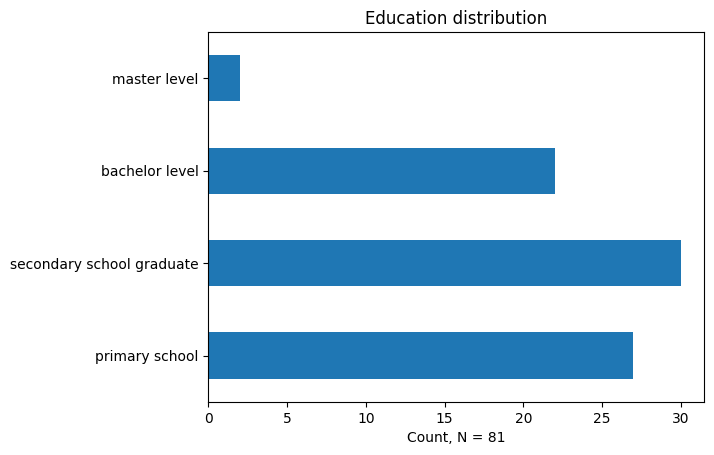

In [3728]:
df1.plot.barh(legend = False)
plt.title('Education distribution')
plt.xlabel('Count, N = 81')


1.2  Visualizing the Education Distribution with Percentages.

In [3729]:
df2 = pd.crosstab(df['education'], 'Count')
df2['percentage'] = round(df2['Count'] / df2['Count'].sum() * 100,2)
df2.index=['primary school','secondary school graduate','bachelor level','master level']
df2.columns.name = ''
df2

,Count,percentage
primary school,27,33.33
secondary school graduate,30,37.04
bachelor level,22,27.16
master level,2,2.47


In [3730]:
type(df2.index.values[0])

str

In [3731]:
df2.loc['Total'] = df2.sum()
df2

,Count,percentage
primary school,27.0,33.33
secondary school graduate,30.0,37.04
bachelor level,22.0,27.16
master level,2.0,2.47
Total,81.0,100.00


In [3732]:
#Finalizing the layout
df2.style.format({'Count': '{:.0f}', 'percentage': '{:.1f} %'})

,Count,percentage
primary school,27,33.3 %
secondary school graduate,30,37.0 %
bachelor level,22,27.2 %
master level,2,2.5 %
Total,81,100.0 %


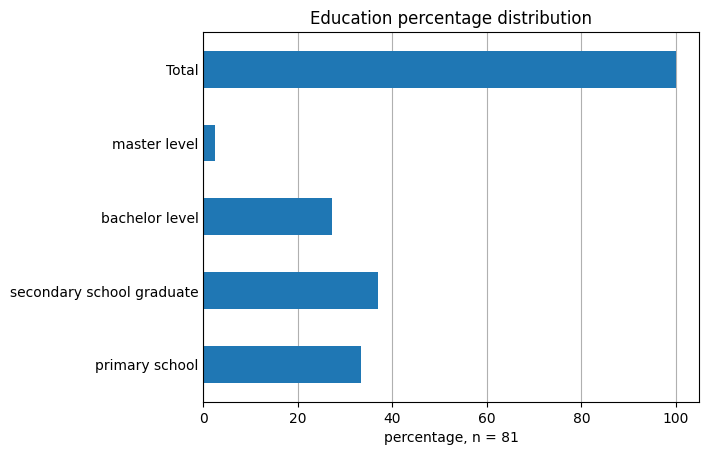

In [3733]:
df2['percentage'].plot.barh(zorder = 2)
plt.title('Education percentage distribution')

plt.xlabel('percentage, n = 81')

plt.grid(axis = 'x')
plt.tick_params(axis = 'y', length = 0)

2. Visualizing the family Distribution.

In [3734]:
# Investigate educaiton and count table
df7=pd.crosstab(df['family'], 'Count')
# Labeling the index with meaningful family categories
df7.index=['single','not single']
# Remove the name of the columns
df7.columns.name=''
df7

,Count
single,30
not single,51


In [3735]:
sum(df7['Count'])

81

Text(0.5, 0, 'Count, N = 81')

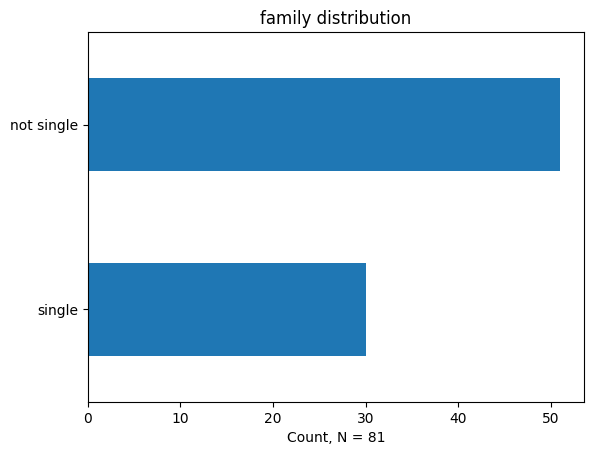

In [3736]:
df7.plot.barh(legend = False)
plt.title('family distribution')
plt.xlabel('Count, N = 81')


3. Visualizing the gender Distribution.

In [3737]:
# Investigate gender and count table
df9=pd.crosstab(df['gender'], 'Count')
# Labeling the index with meaningful gender categories
df9.index=['man','woman']
# Remove the name of the columns
df9.columns.name=''
df9

,Count
man,62
woman,19


Text(0.5, 0, 'Count, N = 81')

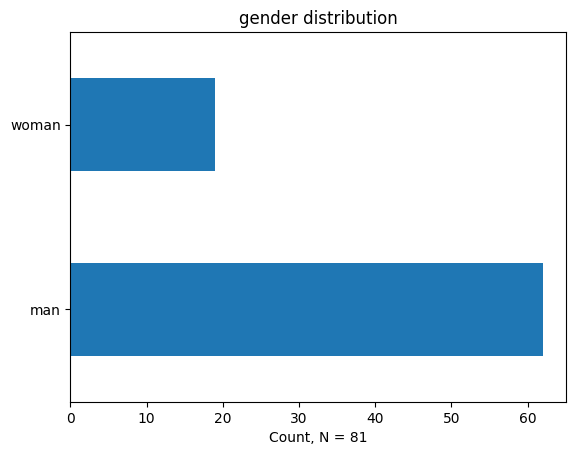

In [3738]:
df9.plot.barh(legend = False)
plt.title('gender distribution')
plt.xlabel('Count, N = 81')

In [3739]:
sum(df7['Count'])

81

#### Numerical Variable
1.1. Visualizing the Salary Distribution(Boxplots chart).

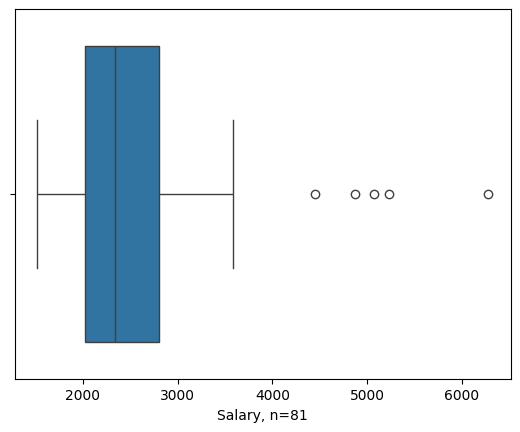

In [3740]:
# Visualize the distribution of salary
ax1 = sns.boxplot(x=df['salary'])
ax1.set_xlabel('Salary, n=' + str(df['salary'].count()))
plt.show()


1.2. Visualizing the Salary Distribution(hist chart).

In [3741]:
min(df['salary'])

1521

In [3742]:
max(df['salary'])

6278

In [3743]:
bins = [1000,2000,3000,4000,5000,6000,7000]
df['salary_class'] = pd.cut(df['salary'], bins = bins)
df.head()

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,salary_class
0,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,"(3000, 4000]"
1,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,"(2000, 3000]"
2,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,"(1000, 2000]"
3,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,"(2000, 3000]"
4,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,"(2000, 3000]"


In [3744]:
df3 = pd.crosstab(df['salary_class'], 'Count')
df3.columns.name = ''
n = df3['Count'].sum()
# add a percentage in the df3 table
df3['percentage'] = round(df3['Count']/df3['Count'].sum() * 100,2)


In [3745]:
type(df3.index.values[0])

pandas._libs.interval.Interval

In [3746]:

df3.index = df3.index.astype(str)
df3.loc['Total'] = df3.sum()
df3

,Count,percentage
salary_class,,
"(1000, 2000]",18.0,22.22
"(2000, 3000]",50.0,61.73
"(3000, 4000]",8.0,9.88
"(4000, 5000]",2.0,2.47
"(5000, 6000]",2.0,2.47
"(6000, 7000]",1.0,1.23
Total,81.0,100.00


In [3747]:
# Checking the Data Type of the Income Class Index
type(df3.index.values[0])

str

In [3748]:
#Finalizing the layout
df3.style.format({'Count': '{:.0f}', 'percentage': '{:.1f} %'})

,Count,percentage
salary_class,,
"(1000, 2000]",18,22.2 %
"(2000, 3000]",50,61.7 %
"(3000, 4000]",8,9.9 %
"(4000, 5000]",2,2.5 %
"(5000, 6000]",2,2.5 %
"(6000, 7000]",1,1.2 %
Total,81,100.0 %


Text(0, 0.5, 'Count, n=81')

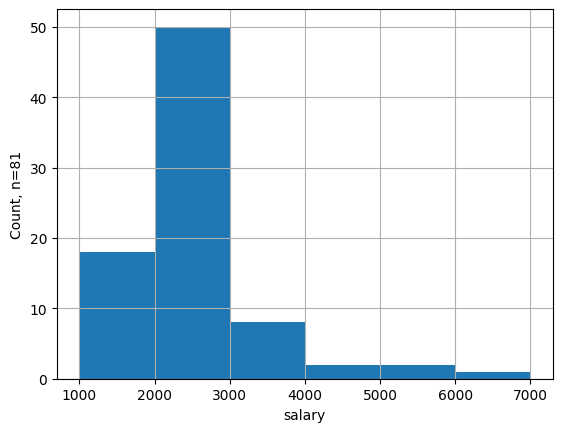

In [3749]:
# Creating a Histogram for salary Distribution (Counts)
df['salary'].hist(bins = bins)
plt.xlabel('salary')
plt.ylabel('Count, n=' + str(n))

Couclusion: the histogram does't look like normal distribution.

2. Visualizing the age Distribution.

In [3750]:
min(df['age'])

20

In [3751]:
max(df['age'])

61

In [3752]:
bins = [10,20,30,40,50,60,70]
df['age_class'] = pd.cut(df['age'], bins = bins)
df.head()

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,salary_class,age_class
0,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,"(3000, 4000]","(30, 40]"
1,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,"(2000, 3000]","(20, 30]"
2,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,"(1000, 2000]","(20, 30]"
3,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,"(2000, 3000]","(30, 40]"
4,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,"(2000, 3000]","(20, 30]"


In [3753]:
df10 = pd.crosstab(df['age_class'], 'Count')
df10.columns.name = ''
n = df10['Count'].sum()
# add a percentage in the df3 table
df10['percentage'] = round(df10['Count']/df10['Count'].sum() * 100,2)
df10

,Count,percentage
age_class,,
"(10, 20]",1,1.23
"(20, 30]",18,22.22
"(30, 40]",35,43.21
"(40, 50]",16,19.75
"(50, 60]",10,12.35
"(60, 70]",1,1.23


In [3754]:
type(df10.index.values[0])

pandas._libs.interval.Interval

In [3755]:

df10.index = df10.index.astype(str)
df10.loc['Total'] = df10.sum()
df10

,Count,percentage
age_class,,
"(10, 20]",1.0,1.23
"(20, 30]",18.0,22.22
"(30, 40]",35.0,43.21
"(40, 50]",16.0,19.75
"(50, 60]",10.0,12.35
"(60, 70]",1.0,1.23
Total,81.0,99.99


In [3756]:
#Finalizing the layout
df10.style.format({'Count': '{:.0f}', 'percentage': '{:.1f} %'})

,Count,percentage
age_class,,
"(10, 20]",1,1.2 %
"(20, 30]",18,22.2 %
"(30, 40]",35,43.2 %
"(40, 50]",16,19.8 %
"(50, 60]",10,12.3 %
"(60, 70]",1,1.2 %
Total,81,100.0 %


Text(0, 0.5, 'Count, n=81')

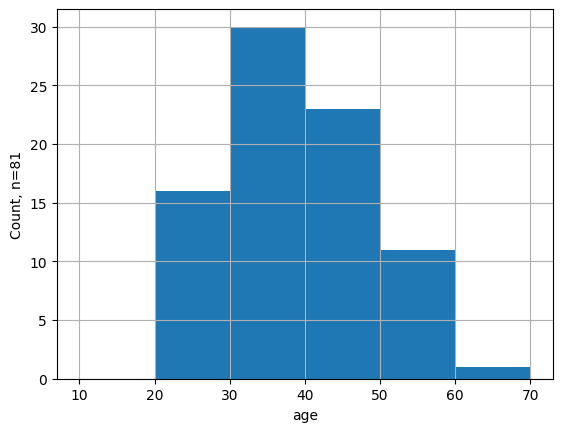

In [3757]:
# Creating a Histogram for age Distribution (Counts)
df['age'].hist(bins = bins)
plt.xlabel('age')
plt.ylabel('Count, n=' + str(n))

3. Visualizing the years_of_service Distribution.

In [3758]:
min(df['years_of_service'])

0.0

In [3759]:
max(df['years_of_service'])

36.0

In [3760]:
bins = [0,10,20,30,40]
df['service_years_class'] = pd.cut(df['years_of_service'], bins = bins)
df.head()

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,salary_class,age_class,service_years_class
0,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,"(3000, 4000]","(30, 40]","(20, 30]"
1,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,"(2000, 3000]","(20, 30]","(0, 10]"
2,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,"(1000, 2000]","(20, 30]","(0, 10]"
3,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,"(2000, 3000]","(30, 40]","(10, 20]"
4,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,"(2000, 3000]","(20, 30]","(0, 10]"


In [3761]:
df11 = pd.crosstab(df['service_years_class'], 'Count')
df11.columns.name = ''
n = df11['Count'].sum()
# add a percentage in the df3 table
df11['percentage'] = round(df11['Count']/df11['Count'].sum() * 100,2)
df11

,Count,percentage
service_years_class,,
"(0, 10]",34,44.16
"(10, 20]",27,35.06
"(20, 30]",14,18.18
"(30, 40]",2,2.60


In [3762]:
type(df11.index.values[0])

pandas._libs.interval.Interval

In [3763]:
df11.index = df11.index.astype(str)
df11.loc['Total'] = df11.sum()
df11

,Count,percentage
service_years_class,,
"(0, 10]",34.0,44.16
"(10, 20]",27.0,35.06
"(20, 30]",14.0,18.18
"(30, 40]",2.0,2.60
Total,77.0,100.00


In [3764]:
#Finalizing the layout
df11.style.format({'Count': '{:.0f}', 'percentage': '{:.1f} %'})

,Count,percentage
service_years_class,,
"(0, 10]",34,44.2 %
"(10, 20]",27,35.1 %
"(20, 30]",14,18.2 %
"(30, 40]",2,2.6 %
Total,77,100.0 %


Text(0, 0.5, 'Count, n=77')

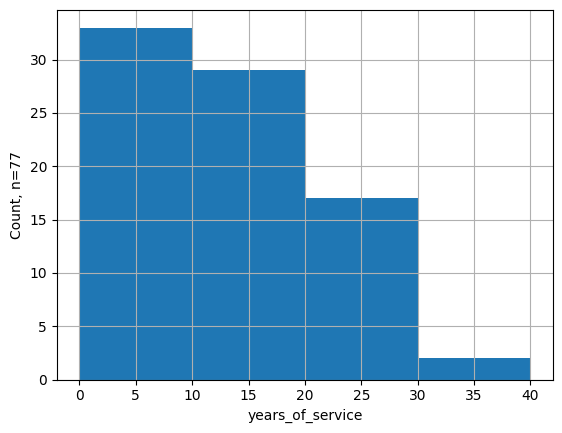

In [3765]:
# Creating a Histogram for years_of_service Distribution (Counts)
df['years_of_service'].hist(bins = bins)
plt.xlabel('years_of_service')
plt.ylabel('Count, n=' + str(n))

## 3.Analyzing Two Variables (Two Categorical Variables)

#### 1. relationship between gender and educations

In [3766]:
# relationship between gender and educations
df4 = round(pd.crosstab(df['education'], df['gender'], normalize = 'columns') * 100,2)
df4.index=['primary school','secondary school graduate','bachelor level','master level']
df4.columns = ['woman', 'man']
df4

,woman,man
primary school,35.48,26.32
secondary school graduate,37.10,36.84
bachelor level,24.19,36.84
master level,3.23,0.00


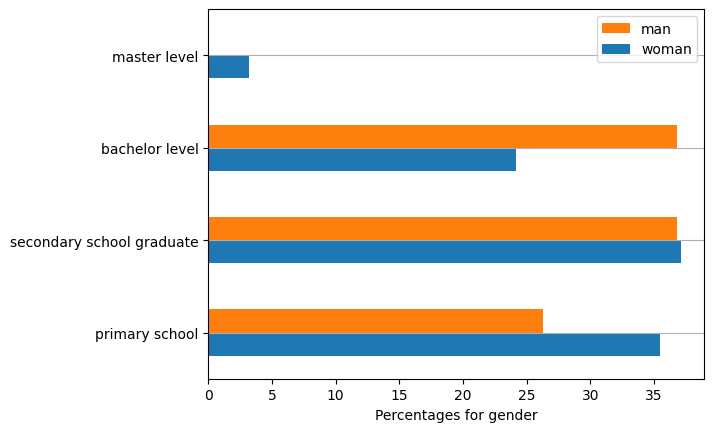

In [3767]:
# A horizontal bar chart is created to visualize the percentage distribution of education levels across genders.
df4.plot.barh(legend = 'reverse')

plt.xlabel('Percentages for gender')

plt.grid(axis = 'y')

In [3768]:
from scipy.stats import chi2_contingency


chi2_contingency(df4)

Chi2ContingencyResult(statistic=np.float64(7.210640196788447), pvalue=np.float64(0.06547854572010044), dof=3, expected_freq=array([[30.9  , 30.9  ],
       [36.97 , 36.97 ],
       [30.515, 30.515],
       [ 1.615,  1.615]]))

#### Conclusion: no significant dependency between "education" and "gender".

- Since the p-value (0.065) is greater than 0.05, the result suggests that there is no significant dependency between education level and gender in this dataset.

- The observed distribution of education levels across genders is likely due to random variation and not due to a meaningful relationship.

#### 2. relationship between gender and family

In [3769]:
# relationship between family and education
df8 = round(pd.crosstab(df['education'], df['family'], normalize = 'columns') * 100,2)
df8.index=['primary school','secondary school graduate','bachelor level','master level']
df8.columns = ['single', 'not single']
df8

/Users/zouqiaoqiao/Library/Python/3.12/lib/python/site-packages/IPython/core/displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,single,not single
primary school,33.33,33.33
secondary school graduate,43.33,33.33
bachelor level,20.00,31.37
master level,3.33,1.96


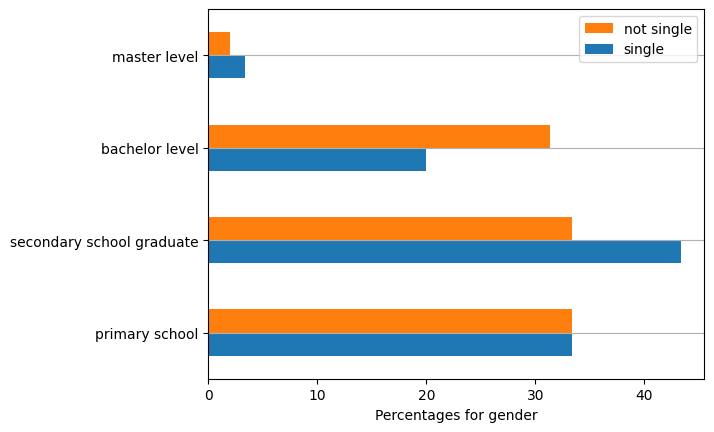

In [3770]:
# A horizontal bar chart is created to visualize the percentage distribution of education levels across families.
df8.plot.barh(legend = 'reverse')

plt.xlabel('Percentages for gender')

plt.grid(axis = 'y')

In [3771]:
chi2_contingency(df8)

Chi2ContingencyResult(statistic=np.float64(4.175846378898363), pvalue=np.float64(0.2430912734858911), dof=3, expected_freq=array([[33.33 , 33.33 ],
       [38.33 , 38.33 ],
       [25.685, 25.685],
       [ 2.645,  2.645]]))

#### Conclusion: no significant dependency between "education" and "gender".

- Since the p-value (0.243) is greater than 0.05, the result suggests that there is no significant dependency between education level and gender in this dataset.

#### 3. relationship between gender and family

In [3772]:
# relationship between family and gender
df9 = round(pd.crosstab(df['gender'], df['family'], normalize = 'columns') * 100,2)
df9.index=['man','women']
df9.columns = ['single', 'not single']
df9

,single,not single
man,90.0,68.63
women,10.0,31.37


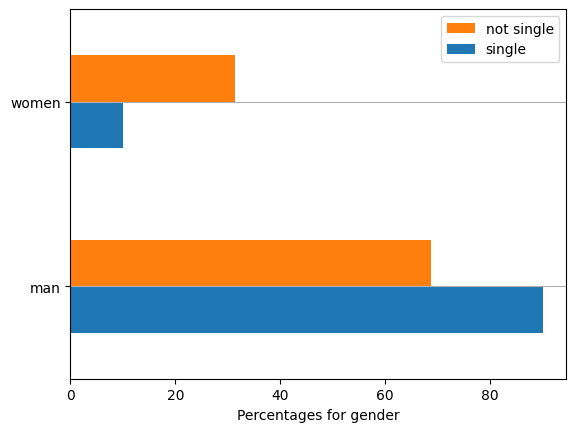

In [3773]:
# A horizontal bar chart is created to visualize the percentage distribution of gender levels across families.
df9.plot.barh(legend = 'reverse')

plt.xlabel('Percentages for gender')

plt.grid(axis = 'y')

In [3774]:
chi2_contingency(df9)

Chi2ContingencyResult(statistic=np.float64(12.645651487306768), pvalue=np.float64(0.00037644026343853435), dof=1, expected_freq=array([[79.315, 79.315],
       [20.685, 20.685]]))

#### Conclusion: no significant dependency between "family" and "gender".

- Since the p-value (0.00037) is lower than 0.05, the result suggests that there is significant dependency between family level and gender in this dataset.

## 4. Analyzing Two Variables (with Numeric variables)

### 1. The difference in gerder and satisfaction of numeric varibles

#### 1.1  Analysis of the difference in  management satisfaction between men and women

In [3775]:
#Extracting various satisfaction variables by gender grouping.
variable_list=['age', 'salary','years_of_service', 'sat_management','sat_colleques', 'sat_workingEnvironment', 'sat_salary', 'sat_tasks']
df5 = df.groupby('gender')[variable_list].mean()
df5.index=['men','women']
df5

,age,salary,years_of_service,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
men,37.387097,2675.274194,11.491935,2.854839,4.129032,3.000000,1.887097,3.112903
women,40.684211,2232.736842,14.421053,3.684211,3.842105,3.947368,2.789474,3.526316


<Axes: >

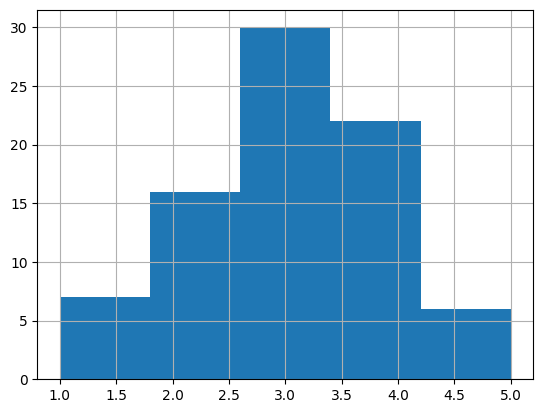

In [3776]:
# check sat_management's distribution .
df['sat_management'].hist(bins=5)

Conclusion: the histogram looks much like normal distribution.

In [3777]:
# 1.Man and women are independent vairibles.
# 2.The sample size >30.
# 3.The value of "sat_management" are normally distributed.

# Forming the data for the groups to be compared
gender1 = df['sat_management'][df['gender'] == 1] # men
gender2 = df['sat_management'][df['gender'] == 2] # women

# Kahden riippumattoman (ind) otoksen t-testi
from scipy.stats import ttest_ind
ttest_ind(gender1, gender2, equal_var = False)  


TtestResult(statistic=np.float64(-3.5925974512124648), pvalue=np.float64(0.000927215546129314), df=np.float64(37.94426745293661))

#### Conclusion of difference for "sat_management" between men and women
- Since the p-value (0.000927) is lower than 0.05, so there is difference between men and women with satisfaction level to management.


#### 1.2  Analysis colleques satisfaction

<Axes: >

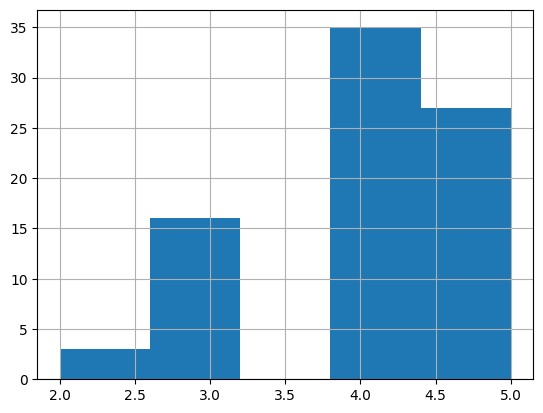

In [3778]:
# check sat_colleques' distribution .
df['sat_colleques'].hist(bins=5)

Conclusion: the histogram does't look like normal distribution.

#### 1.3  Analysis workingEnvironment satisfaction

<Axes: >

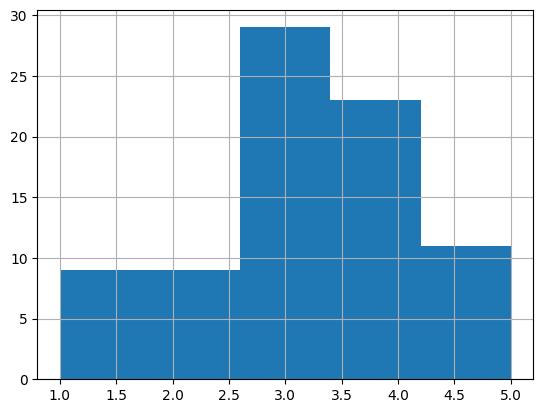

In [3779]:
# check sat_workEnvironment's distribution .
df['sat_workingEnvironment'].hist(bins=5)

Conclusion: the histogram looks like normal distribution.

In [3780]:
# 1.Man and women are independent vairibles.
# 2.The sample size >30.
# 3.The value of "sat_workingEnvironment" are normally distributed.

# Forming the data for the groups to be compared
gender3 = df['sat_workingEnvironment'][df['gender'] == 1] # men
gender4 = df['sat_workingEnvironment'][df['gender'] == 2] # women

# Kahden riippumattoman (ind) otoksen t-testi
from scipy.stats import ttest_ind
ttest_ind(gender3, gender4, equal_var = False)  

TtestResult(statistic=np.float64(-3.5761793026862443), pvalue=np.float64(0.0010606198890500582), df=np.float64(34.34543286610723))

#### Conclusion of difference for "sat_workingEnvironment" between men and women
- Since the p-value (0.00106) is lower than 0.05, so there is difference between men and women with satisfaction level to workingEnvironment.

#### 1.4  Analysis salary satisfaction

<Axes: >

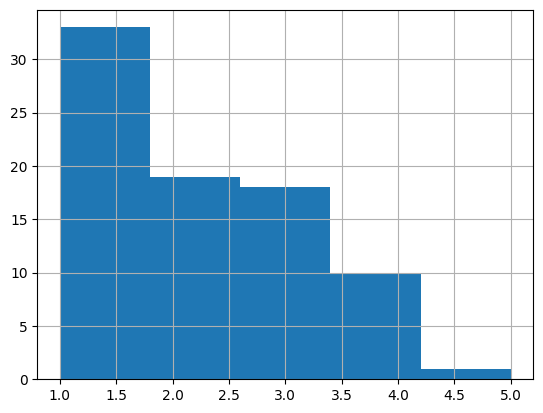

In [3781]:
# check sat_workEnvironment's distribution .
df['sat_salary'].hist(bins=5)

Conclusion: the histogram does't look like normal distribution.

#### 1.5  Analysis task satisfaction

<Axes: >

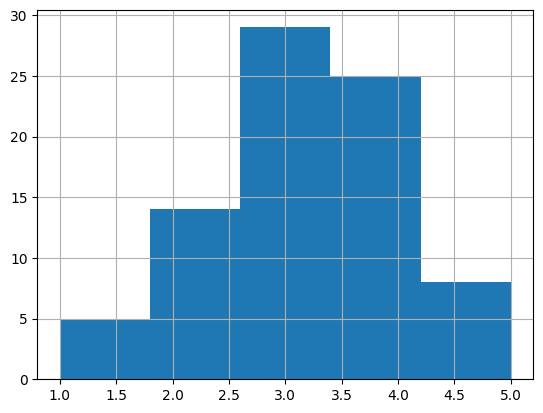

In [3782]:
# check sat_workEnvironment's distribution .
df['sat_tasks'].hist(bins=5)

Conclusion: the histogram look like normal distribution.

In [3783]:
# 1.Man and women are independent vairibles.
# 2.The sample size >30.
# 3.The value of "sat_management" are normally distributed.

# Forming the data for the groups to be compared
gender5 = df['sat_tasks'][df['gender'] == 1] # men
gender6 = df['sat_tasks'][df['gender'] == 2] # women

# Kahden riippumattoman (ind) otoksen t-testi
from scipy.stats import ttest_ind
ttest_ind(gender5, gender6, equal_var = False)  

TtestResult(statistic=np.float64(-1.5375764179499778), pvalue=np.float64(0.13448835860440872), df=np.float64(30.424794223518916))

#### Conclusion of difference for "sat_tasks" between men and women
- Since the p-value (0.1344) is greater than 0.05, so there is indifference between men and women with satisfaction level to tasks.

#### Couclusion: gerder is difference with  satisfaction leve to working environment and management, indifference with satisfaction leve to tasks.

### 2. The difference in family and satisfaction of numeric varibles

In [3784]:
#Extracting various satisfaction variables by gender grouping.
variable_list=['age', 'salary','years_of_service', 'sat_management','sat_colleques', 'sat_workingEnvironment', 'sat_salary', 'sat_tasks']
df5 = df.groupby('family')[variable_list].mean()
df5.index=['single','not single']
df5

,age,salary,years_of_service,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
single,33.200000,2316.033333,8.266667,2.733333,3.966667,2.800000,1.766667,2.80000
not single,41.078431,2721.725490,14.480392,3.235294,4.117647,3.470588,2.294118,3.45098


#### 2.1  Analysis of the difference in  management satisfaction between family